In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
#print("TensorFlow version:", tf.__version__)

In [2]:
TrainingSetInputs = np.load('TrainingSetInputs.npy', allow_pickle=True)
TrainingSetOutputs = np.load('TrainingSetOutputs.npy', allow_pickle=True)
TrainingSetAdditional = np.load('TrainingSetAdditional.npy', allow_pickle=True)

TestSetInputs = np.load('TestSetInputs.npy', allow_pickle=True)
TestSetOutputs = np.load('TestSetOutputs.npy', allow_pickle=True)
TestSetAdditional = np.load('TestSetAdditional.npy', allow_pickle=True)

ValidationSetInputs = np.load('ValidationSetInputs.npy', allow_pickle=True)
ValidationSetOutputs = np.load('ValidationSetOutputs.npy', allow_pickle=True)
ValidationSetAdditional = np.load('ValidationSetAdditional.npy', allow_pickle=True)


train_dataset = tf.data.Dataset.from_tensor_slices((TrainingSetInputs, TrainingSetOutputs))
test_dataset = tf.data.Dataset.from_tensor_slices((TestSetInputs, TestSetOutputs))
validation_dataset = tf.data.Dataset.from_tensor_slices((ValidationSetInputs, ValidationSetOutputs))

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

Batched_train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
Batched_test_dataset = test_dataset.batch(BATCH_SIZE)
Batched_validation_dataset = test_dataset.batch(BATCH_SIZE)

In [3]:
modeltest = keras.models.load_model("./SavedModels/0.125 10 10")

In [5]:
test_loss= modeltest.evaluate(Batched_validation_dataset)
print(test_loss)
#print(test_acc)

150/150 [==============================] - 1s 2ms/step - loss: 0.0035 - accuracy: 0.2914
[0.0035193904768675566, 0.2913541793823242]


In [6]:
Gradients = np.load('Gradients.npy', allow_pickle=True)
Y_intercepts = np.load('C_Intercept.npy', allow_pickle=True)


GradientsFrequency = Gradients[6:]
Y_interceptsFerquency = Y_intercepts[6:]
#print(Gradients)
#print(Y_intercepts)

In [7]:
def Decoder(NN_Output,Thickness , ElasticModulus, Density):
    return ((ElasticModulus/Density)**0.5)*((10**((NN_Output-Y_interceptsFerquency)/GradientsFrequency))/Thickness)

1/1 [==============================] - 0s 99ms/step
0.006005385195387014 283662961408.085 7853.168947068307
Prediction [[ 161.44757857  233.21512719  401.34895872  490.63553974  608.75905209
   765.53414372  893.13887765 1025.0819266 ]]
Actual [146.31829688 150.06825323 338.24606287 384.32552651 402.27531758
 493.89425115 610.06289896 732.75147089]


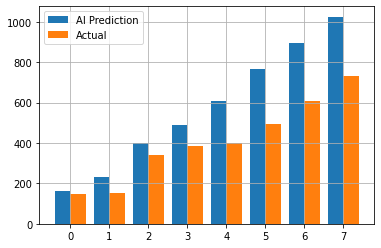

In [22]:
IndexToTest = 1


DataToPredict = tf.convert_to_tensor([TestSetInputs[IndexToTest]])


thickness = TestSetAdditional[IndexToTest][0]
ElasticModulus = TestSetAdditional[IndexToTest][1]
Density = TestSetAdditional[IndexToTest][2]



thickness = (thickness-Y_intercepts[0])/Gradients[0]
ElasticModulus = (ElasticModulus-Y_intercepts[3])/Gradients[3]
Density = (Density-Y_intercepts[4])/Gradients[4]

predictions = Decoder(modeltest.predict(DataToPredict),thickness,ElasticModulus,Density)
actual = Decoder(TestSetOutputs[IndexToTest],thickness,ElasticModulus,Density)

print(thickness,ElasticModulus,Density)

print("Prediction", predictions)
print("Actual", actual)

Frequencies = ['f1','f2','f3','f4','f5','f6','f7','f8']

plt.figure()

X_axis = np.arange(len(Frequencies))
plt.bar(X_axis-0.2, predictions[0], 0.4, label = 'AI Prediction')
plt.bar(X_axis+0.2, actual, 0.4, label = 'Actual')
plt.grid()
plt.legend()
plt.show()

In [26]:
accuracy = []

for i in range(5):
    thickness = TestSetAdditional[i][0]
    ElasticModulus = TestSetAdditional[i][1]
    Density = TestSetAdditional[i][2]



    thickness = (thickness-Y_intercepts[0])/Gradients[0]
    ElasticModulus = (ElasticModulus-Y_intercepts[3])/Gradients[3]
    Density = (Density-Y_intercepts[4])/Gradients[4]

    predictions = Decoder(modeltest.predict(DataToPredict),thickness,ElasticModulus,Density)[0]
    actual = Decoder(TestSetOutputs[i],thickness,ElasticModulus,Density)

    print(predictions)
    print(actual)
    print(abs(predictions-actual)/actual)
    accuracy.append(np.mean(abs(predictions-actual)/actual))

print(np.mean(accuracy))


    
    

1/1 [==============================] - 0s 34ms/step
[ 99.05386369 143.08582157 246.24194059 301.02245143 373.49545099
 469.68257684 547.97264494 628.92442447]
[ 110.85418837  288.63486807  307.16389667  595.80876421  604.84829031
  938.25081139 1002.44744583 1330.63024056]
[0.10644906 0.50426703 0.19833697 0.49476666 0.3824973  0.49940616
 0.45336521 0.52734847]
1/1 [==============================] - 0s 32ms/step
[ 161.44757857  233.21512719  401.34895872  490.63553974  608.75905209
  765.53414372  893.13887765 1025.0819266 ]
[146.31829688 150.06825323 338.24606287 384.32552651 402.27531758
 493.89425115 610.06289896 732.75147089]
[0.10339979 0.55406038 0.18655914 0.2766145  0.51328959 0.54999606
 0.46401114 0.39894899]
1/1 [==============================] - 0s 33ms/step
[ 95.52952952 137.99483137 237.48065807 290.3120796  360.20649152
 452.97128167 528.47579097 606.54730806]
[159.88680462 177.37645508 371.87256802 402.95194689 467.59065507
 550.26900272 695.30610411 788.44424272]
[0.4

In [16]:
accuracyold = accuracy